In [57]:
import pandas as pd
df = pd.read_csv('sat.trn', sep='\s+',header=None)

In [58]:
df

,0,1,2,3,4,5,6,7,8,9,...,27,28,29,30,31,32,33,34,35,36
0,92,115,120,94,84,102,106,79,84,102,...,104,88,121,128,100,84,107,113,87,3
1,84,102,106,79,84,102,102,83,80,102,...,100,84,107,113,87,84,99,104,79,3
2,84,102,102,83,80,102,102,79,84,94,...,87,84,99,104,79,84,99,104,79,3
3,80,102,102,79,84,94,102,79,80,94,...,79,84,99,104,79,84,103,104,79,3
4,84,94,102,79,80,94,98,76,80,102,...,79,84,103,104,79,79,107,109,87,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4430,56,64,108,96,64,71,108,96,68,75,...,92,66,83,108,96,66,87,104,89,5
4431,64,71,108,96,68,75,108,96,71,87,...,96,66,87,104,89,63,87,104,89,5
4432,68,75,108,96,71,87,108,88,71,91,...,89,63,87,104,89,70,100,104,85,4
4433,71,87,108,88,71,91,100,81,76,95,...,89,70,100,104,85,70,91,104,85,4


In [83]:

feature_cols = list(df.columns) 
feature_cols = feature_cols[0:36]
target = ['class']
X_train = df[feature_cols]
y_train = df[36]

In [84]:
df2 = pd.read_csv('sat.tst', sep='\s+',header=None)
feature_cols = list(df2.columns) 
feature_cols = feature_cols[0:36]
target = ['class']
X_test = df2[feature_cols]
y_test= df2[36]

In [85]:
X_test

,0,1,2,3,4,5,6,7,8,9,...,26,27,28,29,30,31,32,33,34,35
0,80,102,102,79,76,102,102,79,76,102,...,109,87,79,107,109,87,79,107,113,87
1,76,102,102,79,76,102,106,83,76,102,...,109,87,79,107,113,87,79,103,104,83
2,80,98,106,79,76,94,102,76,76,94,...,104,79,79,95,100,79,79,95,96,75
3,76,94,102,76,76,94,102,76,76,94,...,100,79,79,95,96,75,79,95,100,75
4,76,94,102,76,76,94,102,76,76,89,...,96,75,79,95,100,75,75,95,100,79
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,60,83,96,85,64,87,100,88,64,83,...,104,92,66,87,108,89,63,83,104,85
1996,64,79,100,85,56,71,96,85,56,68,...,100,85,66,83,100,85,63,83,100,81
1997,56,68,91,81,56,64,91,81,53,64,...,100,81,59,87,96,81,63,83,92,74
1998,56,68,87,74,60,71,91,81,60,64,...,96,74,59,83,92,74,59,83,92,70


In [86]:
from sklearn.manifold import TSNE
data_X = X_train
y = y_train
tsne = TSNE(n_components=2, random_state=0)
tsne_obj= tsne.fit_transform(data_X)
tsne_obj

array([[ 0.7299172, 77.959915 ],
       [ 8.49585  , 30.78419  ],
       [-3.7053242, 31.460503 ],
       ...,
       [37.50591  ,  0.8119747],
       [38.16821  ,  2.2965353],
       [38.27333  ,  2.709112 ]], dtype=float32)

In [87]:
import pandas as pd
tsne_df = pd.DataFrame({'X':tsne_obj[:,0],
                        'Y':tsne_obj[:,1],
                        'Labels':y})
tsne_df.head()

,X,Y,Labels
0,0.729917,77.959915,3
1,8.495850,30.784189,3
2,-3.705324,31.460503,3
3,-10.973637,22.074110,3
4,-3.584506,26.228468,3


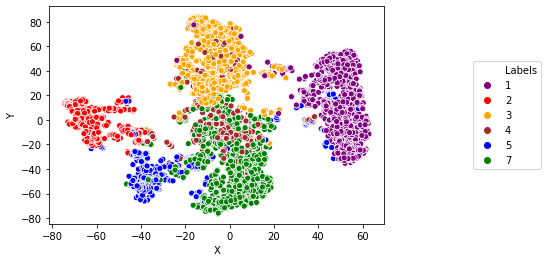

In [88]:
import seaborn as sns
scatter = sns.scatterplot(x="X", y="Y",
              hue="Labels",
              palette=['purple','red','orange','brown','blue','green'],
                       #'dodgerblue','green','lightgreen','darkcyan', 'black'],
              legend='full',
              data=tsne_df);
scatter.legend(loc='center left', bbox_to_anchor=(1.25, 0.5), ncol=1)